In [1]:
import numpy as np
import pandas as pd
df_heart = pd.read_csv('./dataset/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# 输出分类值，及各个类别数目
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

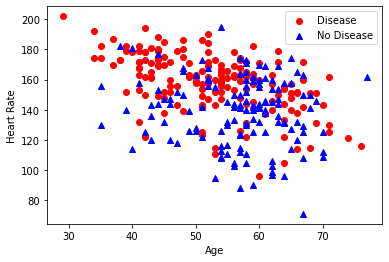

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target==1],
                        y=df_heart.thalach[(df_heart.target==1)], c='red')
plt.scatter(x=df_heart.age[df_heart.target==0],
                        y=df_heart.thalach[(df_heart.target==0)], marker='^', c='blue')
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.show()

In [4]:
# 把3个文本型变量转换为哑变量
a = pd.get_dummies(df_heart['cp'], prefix = 'cp')
b = pd.get_dummies(df_heart['thal'], prefix = 'thal')
c = pd.get_dummies(df_heart['slope'], prefix = 'slope')
# 把哑变量添加进dataframe
frames = [df_heart, a, b, c]
df_heart = pd.concat(frames, axis = 1)
df_heart = df_heart.drop(columns = ['cp', 'thal', 'slope'])
df_heart.head() # 显示新的dataframe

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [5]:
# 构建特征集
X = df_heart.drop(['target'], axis=1)
y = df_heart.target.values
y = y.reshape(-1, 1)
print("张量X的形状：", X.shape)
print("张量y的形状：", y.shape)

张量X的形状： (303, 21)
张量y的形状： (303, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 首先定义一个Sigmoid函数，输入Z，返回y'
def sigmoid(z):
    y_hat = 1 / (1+np.exp(-z))
    return y_hat

In [9]:
# 然后定义损失函数
def loss_function(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)
    loss = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    cost = np.sum(loss) / X.shape[0]
    return cost

In [10]:
# 然后构建梯度下降的函数
def gradient_descent(X, y, w, b, alpha, iterations):
    l_history = np.zeros(iterations)
    w_history = np.zeros((iterations, w.shape[0], w.shape[1]))
    b_history = np.zeros(iterations)
    for i in range(iterations):
        y_hat = sigmoid(np.dot(X, w)+b)
        loss = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
        derivative_w = np.dot(X.T, ((y_hat-y))) / X.shape[0]
        derivative_b = np.sum(y_hat-y) / X.shape[0]
        w = w - alpha * derivative_w
        b = b - alpha * derivative_b
        l_history[i] = loss_function(X, y, w, b)
        print ("轮次", i+1 , "当前轮训练集损失：",l_history[i]) 
        w_history[i] = w # 梯度下降过程中权重的历史 请注意w_history和w的形状
        b_history[i] = b # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history

In [11]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    y_pred = np.zeros((y_hat.shape[0], 1))
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i, 0] = 0
        else:
            y_pred[i, 0] = 1
    return y_pred

In [12]:
def logistic_regression(X,y,w,b,lr,iter): # 定义逻辑回归模型
    l_history,w_history,b_history = gradient_descent(X,y,w,b,lr,iter)#梯度下降
    print("训练最终损失:", l_history[-1]) # 打印最终损失
    y_pred = predict(X,w_history[-1],b_history[-1]) # 进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y_train))*100 # 计算准确率
    print("逻辑回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return l_history, w_history, b_history # 返回训练历史记录

In [13]:
#初始化参数
dimension = X.shape[1] # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension,1),0.1) # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0 # 偏置值
#初始化超参数
alpha = 1 # 学习速率
iterations = 500 # 迭代次数

In [14]:
# 用逻辑回归函数训练机器
loss_history, weight_history, bias_history =  \
            logistic_regression(X_train,y_train,weight,bias,alpha,iterations)

轮次 1 当前轮训练集损失： 0.6103906883532463
轮次 2 当前轮训练集损失： 0.5497374292222259
轮次 3 当前轮训练集损失： 0.5086039878139762
轮次 4 当前轮训练集损失： 0.479568214335022
轮次 5 当前轮训练集损失： 0.4583508643174537
轮次 6 当前轮训练集损失： 0.44235438858119774
轮次 7 当前轮训练集损失： 0.42995851427877985
轮次 8 当前轮训练集损失： 0.4201202336822729
轮次 9 当前轮训练集损失： 0.4121469259144004
轮次 10 当前轮训练集损失： 0.4055652125942486
轮次 11 当前轮训练集损失： 0.40004305670699797
轮次 12 当前轮训练集损失： 0.3953421149176739
轮次 13 当前轮训练集损失： 0.3912877502040581
轮次 14 当前轮训练集损失： 0.38774964717770416
轮次 15 当前轮训练集损失： 0.38462896881821457
轮次 16 当前轮训练集损失： 0.3818496538171244
轮次 17 当前轮训练集损失： 0.3793523978819297
轮次 18 当前轮训练集损失： 0.3770904132341603
轮次 19 当前轮训练集损失： 0.37502639005333077
轮次 20 当前轮训练集损失： 0.3731302854133004
轮次 21 当前轮训练集损失： 0.3713776915839163
轮次 22 当前轮训练集损失： 0.3697486162885278
轮次 23 当前轮训练集损失： 0.3682265600730514
轮次 24 当前轮训练集损失： 0.36679781078256135
轮次 25 当前轮训练集损失： 0.36545089861442454
轮次 26 当前轮训练集损失： 0.3641761712735571
轮次 27 当前轮训练集损失： 0.36296545989492374
轮次 28 当前轮训练集损失： 0.361811814228927
轮次 29 当前轮训练集损失： 0.3607

In [15]:
y_pred = predict(X_test,weight_history[-1],bias_history[-1]) # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test))*100 # 计算准确率
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 73.77%


In [16]:
print ("逻辑回归预测分类值:",predict(X_test,weight_history[-1],bias_history[-1]))

逻辑回归预测分类值: [[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]


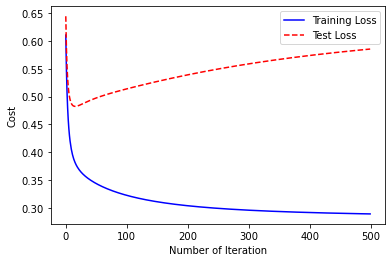

In [17]:
loss_history_test = np.zeros(iterations) # 初始化历史损失
for i in range(iterations): #求训练过程中不同参数带来的测试集损失
    loss_history_test[i] = loss_function(X_test,y_test,
                                         weight_history[i],bias_history[i])
index = np.arange(0,iterations,1)
plt.plot(index, loss_history,c='blue',linestyle='solid')
plt.plot(index, loss_history_test,c='red',linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show() # 同时显示显示训练集和测试集损失曲线

In [18]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
lr = LogisticRegression() # lr,就代表是逻辑回归模型
lr.fit(X_train,y_train) # fit,就相当于是梯度下降
print("SK-learn逻辑回归测试准确率{:.2f}%".format(lr.score(X_test,y_test)*100))

SK-learn逻辑回归测试准确率77.05%


D:\Anaconda3\envs\Vuean_ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
